In this notebook, we will demonstrate how `TableAutomization.py` can be used for PDE type of problems. We will use 1D heat equation as an example.

In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
import utilities 
import benchmarksClass as BC 
import matplotlib.pyplot as plt

## 1D Heat Equation
The PDE is given by:

$$ \frac{\partial u(\xi,\tau)}{\partial \tau} - c^2 \Delta_\xi u(\xi,\tau)   = f(\xi,\tau), \;\text{in}\;[0,1] $$
$$u(0,\tau)= u(L,\tau)= 0 $$

where $u(\xi,\tau)$ is the temperature and $c^2$ is the thermal diffusivity (assumed to be 1 here). We assume the source term $f$ is zero. The unknown parameters (random variable) for this test problem is the initial heat profile $g(\xi):=u(\xi,0)$.

The data $y$ is a random variable containing the temperature measurements everywhere in the domain at the final time $\tau^\mathrm{max}$(assumed to be 0.02 here) corrupted by Gaussian noise(We use $\sigma_\text{noise}=0.02$ here):

$$y = \mathcal{G}(g) + \eta, \;\;\; \eta\sim\mathrm{Gaussian}(0,\sigma_\text{noise}^2\mathbf{I}),$$ 

where $\mathcal{G}(g)$ is the forward model that maps the initial condition $g$ to the final time solution via solving the 1D time-dependent heat problem. $\eta$ is the measurement noise.

Given observed data $y^\text{obs}$ the task is to infer the initial heat profile $g$.

We use finite difference method to solve the problem and set the number of nodes as 30 here.

###  parameterization

Here, we parametarize random varable $g(\xi)$ as stepfunction, that is ,the number of parameter we use is the number of steps. We use 3 steps in this example.

This is a graph to show the example of what the step function looks like.

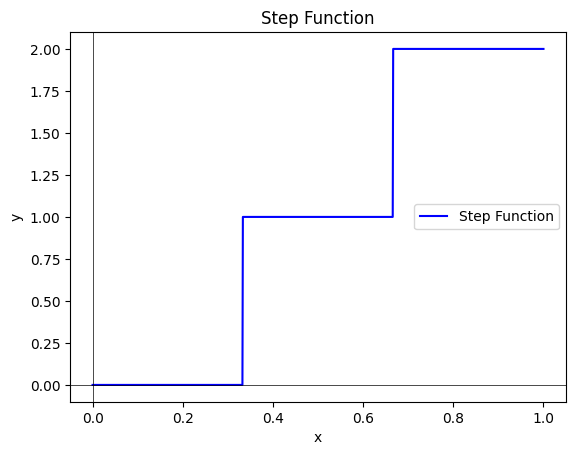

In [2]:
# Define the step function
def step_function_example(x):
    return np.where(x >= 2/3, 2, np.where(x >= 1/3, 1, 0))

x = np.linspace(0, 1, 1000)


y = step_function_example(x)

plt.plot(x, y, label='Step Function', color='blue')
plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

We set the prior as an i.i.d multivariate Gaussian with mean $0$ and variance $1.2^2$. 
And we are using observed data in data_heat.npy

## Sampling from posterior distribution

In [3]:
target_heatstep = BC.HeatStep()
x0 = BC.HeatStep().x0

Note that we used finite difference gradient for computing gradient based sampling.

In [4]:
samples_heat = utilities.MCMCComparison(dim = 3, target= target_heatstep, x0 = x0,scale = [0.027,0.027,0.000233,0.000233,0.5], Ns = 8000, Nb= 2000, seed = 12,chains=3)

In [5]:
samples_heat.create_comparison()

Sample 10000 / 10000

Average acceptance rate: 0.212875 

Sample 10000 / 10000

Average acceptance rate all components: 0.48054166666666664 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.212875 

Sample 10000 / 10000

Average acceptance rate all components: 0.48054166666666664 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.212875 

Sample 10000 / 10000

Average acceptance rate all components: 0.48054166666666664 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000


,MH,CWMH,ULA,MALA,NUTS
samples,8000,8000,8000,8000,8000
burnins,2000,2000,2000,2000,2000
scale,0.027,0.027,0.000233,0.000233,-
ESS(max),174.657,199.049,380.921,152.974,2550.507
ESS(min),153.69,158.335,284.272,122.862,2275.59
ESS(mean),161.778,183.916,335.406,139.599,2423.957
AR,0.213,0.522,1.0,0.539,0.789
LogPDF,20000,59996,100000,100000,531540
Gradient,0,0,10000,10000,53154
Rhat(max),1.006,1.001,1.002,1.002,1.0


array([[<Axes: ylabel='v1'>, <Axes: >],
       [<Axes: xlabel='v0', ylabel='v2'>, <Axes: xlabel='v1'>]],
      dtype=object)

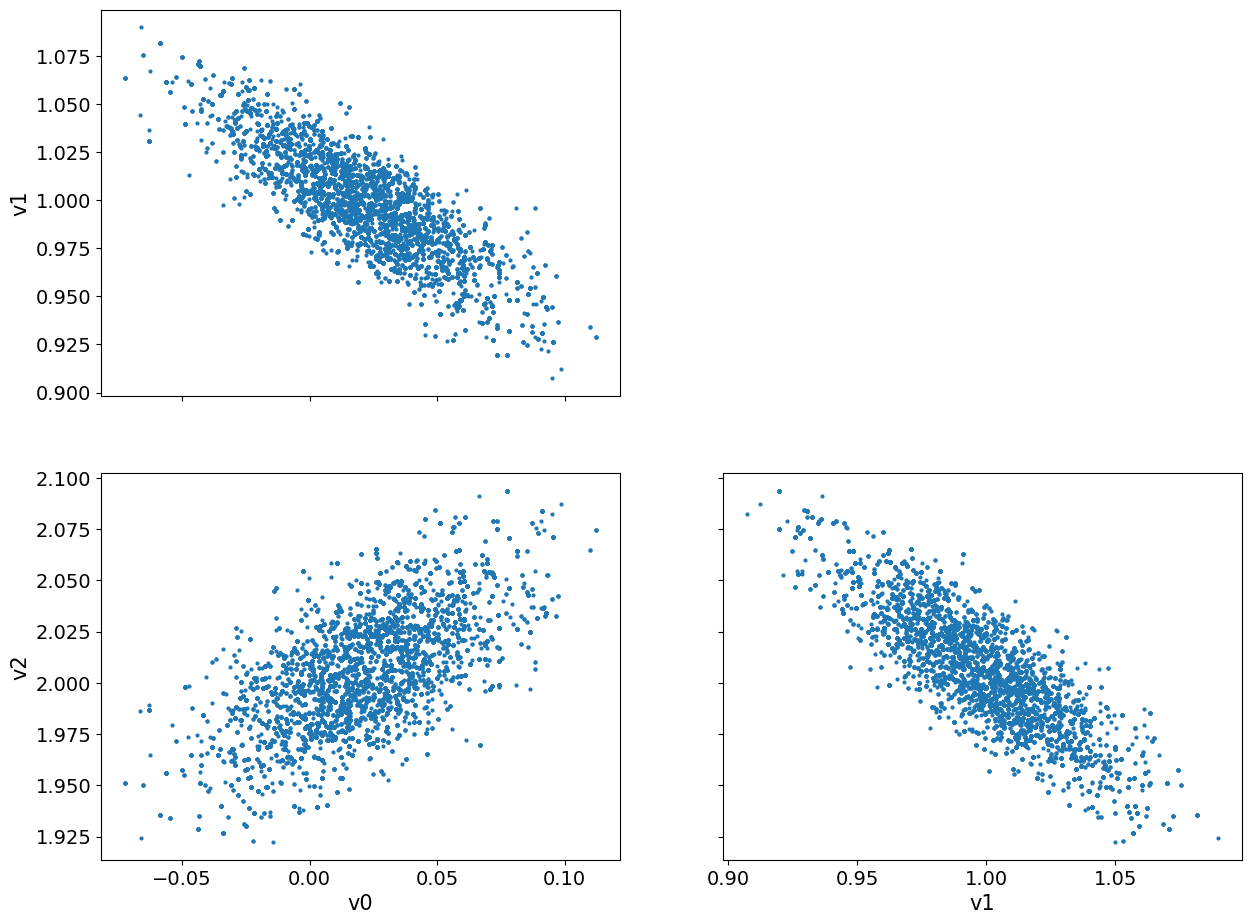

In [6]:
samples_heat.get_sampling_result("MH")["samples"].plot_pair()